#movies recommendation system

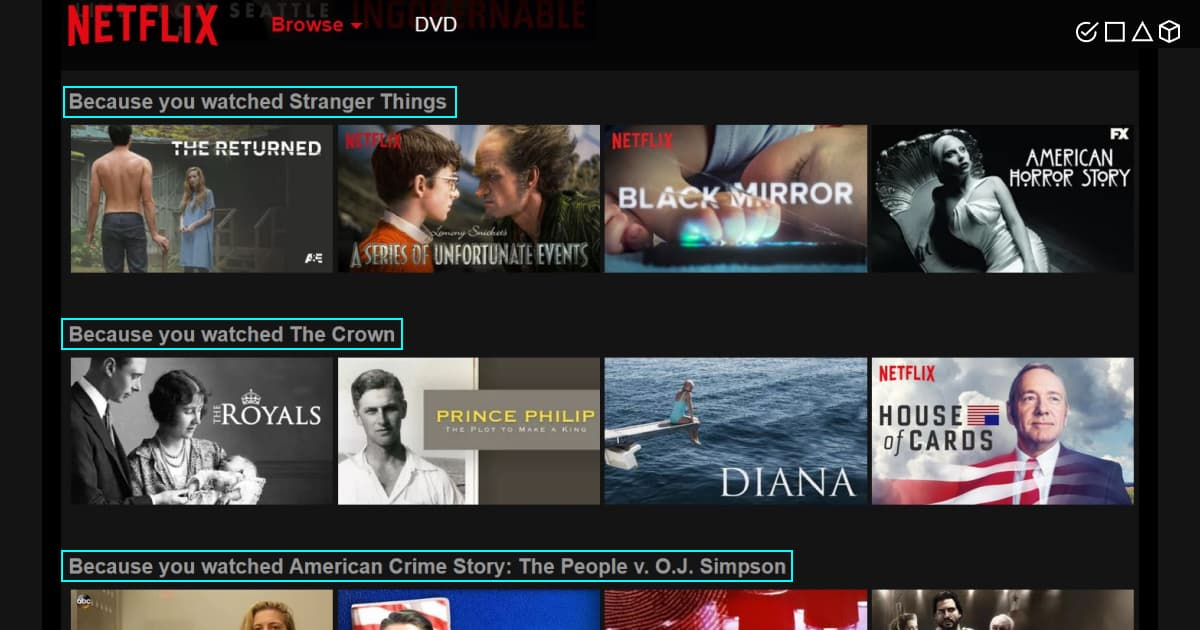

#Filtration Strategies for Movie Recommendation Systems

Movie recommendation systems use a set of different filtration strategies and algorithms to help users find the most relevant films. The most popular categories of the ML algorithms used for movie recommendations include content-based filtering and popularity based filtering and collorative based filtering

#— Content-Based Filtering

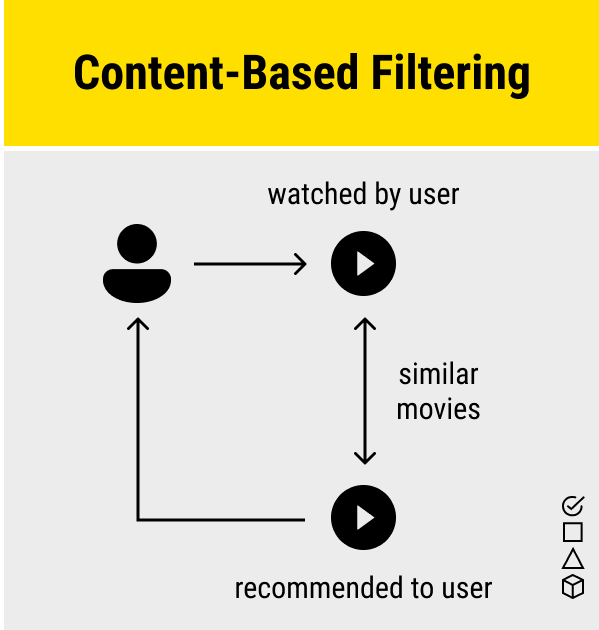

A filtration strategy for movie recommendation systems, which uses the data provided about the items (movies). This data plays a crucial role here and is extracted from only one user. An ML algorithm used for this strategy recommends motion pictures that are similar to the user’s preferences in the past. Therefore, the similarity in content-based filtering is generated by the data about the past film selections and likes by only one user.

How does it work? The recommendation system analyzes the past preferences of the user concerned, and then it uses this information to try to find similar movies. This information is available in the database (e.g., lead actors, director, genre, etc.). After that, the system provides movie recommendations for the user. That said, the core element in content-based filtering is only the data of only one user that is used to make predictions.

#How to Build a Movie Recommendation System?

Once we’ve discussed the basics of film recommendation engines in machine learning, we can move on to building an actual movie recommendation system. So, we need to build an engine that learns and recognizes patterns in a user’s viewing history before using these patterns to generate new recommendations. What’s required for this?

1.Data: ML systems need data, so find and import the essential libraries with movie datasets that already have global ratings.

2.Analysis: Create generic recommendations of top-rated movies from the existing dataset.

3.Personalization: Get personalized ratings by providing your own movie scores.

4.Strategy: Implement content-based or collaborative filtering strategy.

5.Combination: Combine recommendation lists to get a reasonable estimate across the ratings. The combined dataset of movie ratings can now be used for either filtering model.

In [78]:
#importing the depencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_csv('/content/drive/MyDrive/movies.csv')

In [80]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [81]:
df.shape

(4803, 24)

In [82]:
#select the feature that are required
select_feature=['genres','tagline','title','cast','director']

In [83]:
print(select_feature)

['genres', 'tagline', 'title', 'cast', 'director']


In [84]:
#replace the null values with the empty string
for feature in select_feature:
  df[feature]=df[feature].fillna(' ')

In [85]:
#to check the null values
df[feature].isnull().sum()

0

In [86]:
#combine the all data together
combine_feature=df['genres']+" "+df['tagline']+" "+df['title']+" "+df['cast']+" "+df['director']

In [87]:
print(combine_feature)

0       Action Adventure Fantasy Science Fiction Enter...
1       Adventure Fantasy Action At the end of the wor...
2       Action Adventure Crime A Plan No One Escapes S...
3       Action Crime Drama Thriller The Legend Ends Th...
4       Action Adventure Science Fiction Lost in our w...
                              ...                        
4798    Action Crime Thriller He didn't come looking f...
4799    Comedy Romance A newlywed couple's honeymoon i...
4800    Comedy Drama Romance TV Movie   Signed, Sealed...
4801      A New Yorker in Shanghai Shanghai Calling Da...
4802    Documentary   My Date with Drew Drew Barrymore...
Length: 4803, dtype: object


#TfidfVectorizer - 
Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.

In [88]:
#convert the text into numbers
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
combine_feature=vector.fit_transform(combine_feature)

In [89]:
print(combine_feature)

  (0, 2421)	0.20498723091678908
  (0, 7646)	0.13396942598153472
  (0, 12767)	0.2305175668086983
  (0, 10095)	0.19058285582291734
  (0, 8638)	0.2695083057627832
  (0, 14317)	0.18012129262937598
  (0, 16311)	0.23685039758049767
  (0, 13785)	0.24443232009953042
  (0, 13056)	0.25842000358823686
  (0, 16924)	0.23825213744042806
  (0, 16641)	0.28059660793732955
  (0, 13084)	0.17797089288768772
  (0, 1042)	0.3385691625954086
  (0, 11336)	0.3118527762596846
  (0, 11028)	0.10154391473217346
  (0, 16632)	0.1684840387819162
  (0, 14921)	0.06626793011718497
  (0, 4876)	0.2695083057627832
  (0, 5331)	0.12307240756473234
  (0, 13310)	0.12336112500518792
  (0, 5177)	0.1324723990568141
  (0, 288)	0.10706270050306509
  (0, 219)	0.0933484063897901
  (1, 15990)	0.2141431930462732
  (1, 6200)	0.20768385190468022
  :	:
  (4801, 2403)	0.23900020804718675
  (4801, 16897)	0.25451762762401703
  (4801, 13548)	0.4669236025476485
  (4801, 4770)	0.21794438169699398
  (4801, 412)	0.15633504603910917
  (4801, 6867)	

#Cosine similarity
- is a measure of similarity between two non-zero vectors. It is calculated as the angle between these vectors (which is also the same as their inner product).

In [90]:
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
# to determine the similarity between the movies
similarity=cosine_similarity(combine_feature)

In [92]:
print(similarity)

[[1.         0.10825922 0.04899611 ... 0.         0.         0.        ]
 [0.10825922 1.         0.02245351 ... 0.         0.         0.        ]
 [0.04899611 0.02245351 1.         ... 0.         0.05209848 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.02713434]
 [0.         0.         0.05209848 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02713434 0.         1.        ]]


In [93]:
# getting the input from user
movies_name=input("enter the your favorite movie: ")

enter the your favorite movie: iron man


In [94]:
list_of_movies=df["title"].tolist()

In [95]:
print(list_of_movies)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

#Difflib
- is a built-in module in the Python programming language consisting of different simple functions and classes that allow users to compare data sets. The module offers the outputs of these sequence comparisons in a format that can be read by a human, using deltas to show the differences more efficiently.

In [96]:
import difflib

In [97]:
# to check the input is present in title 
find_match=difflib.get_close_matches(movies_name,list_of_movies)

In [98]:
print(find_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [99]:
# get the 1 st one in list
close_match=find_match[0]

In [100]:
print(close_match)

Iron Man


In [101]:
#get the index of movie
index_movies=df[df.title==close_match]['index'].values[0]

In [102]:
print(index_movies)

68


In [103]:
#getting the similarity score of all with input movie
similarity_score=list(enumerate(similarity[index_movies]))

In [104]:
print(similarity_score)

[(0, 0.045993374703142034), (1, 0.02162327722696725), (2, 0.017350253055564997), (3, 0.008185739686466223), (4, 0.042554146016343934), (5, 0.041851196600929556), (6, 0.09361961694808014), (7, 0.12470918108155893), (8, 0.009460391761823266), (9, 0.015756515587255847), (10, 0.04835000410764272), (11, 0.01436986594689069), (12, 0.03703777914563516), (13, 0.015807861641173992), (14, 0.0880784507082271), (15, 0.008615524552384433), (16, 0.13739713394354308), (17, 0.015490467678493339), (18, 0.06261994388560504), (19, 0.014356684888604643), (20, 0.04065945613304973), (21, 0.015630903367998134), (22, 0.007548904606885316), (23, 0.008071013422274903), (24, 0.01816788677435998), (25, 0.0), (26, 0.13362969800420774), (27, 0.0403397825642711), (28, 0.07995231527824696), (29, 0.018332819553720806), (30, 0.04180782268641011), (31, 0.33509100445486123), (32, 0.035820300710972176), (33, 0.04353754184535042), (34, 0.0), (35, 0.04183861365191895), (36, 0.0370477849166444), (37, 0.009114155044583197), (

In [105]:
len(similarity_score)

4803

In [106]:
#sorting the similarity score
sorted_similar_movie=sorted(similarity_score, key=lambda x:x[1],reverse=True)

In [107]:
print(sorted_similar_movie)

[(68, 1.0000000000000002), (79, 0.4065363997884737), (31, 0.33509100445486123), (3623, 0.18143951309365722), (131, 0.1549332245266638), (2651, 0.15439640537382723), (353, 0.15140520480368289), (661, 0.1443120827908503), (138, 0.14184794941600073), (2487, 0.13859038222045197), (16, 0.13739713394354308), (720, 0.1354239236688139), (607, 0.13538785163775682), (26, 0.13362969800420774), (1210, 0.13211737591354517), (618, 0.13157893363767356), (3166, 0.12783598405262314), (7, 0.12470918108155893), (977, 0.12455039010346165), (783, 0.1227535949255204), (1406, 0.12239517389629664), (954, 0.12158151335466395), (2868, 0.12131661291099081), (2880, 0.12047405147354938), (800, 0.12007055458314059), (3443, 0.1185887303567352), (2186, 0.11847627142790484), (356, 0.1162212745636038), (39, 0.11484101921558161), (2235, 0.11442002782232127), (3395, 0.11297687988675131), (182, 0.11212631206548579), (2875, 0.11090616572858494), (198, 0.1106709003809952), (85, 0.11059122065490606), (1780, 0.110374610393591

In [108]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movie:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Made
5 . G-Force
6 . The Good Night
7 . Tropic Thunder
8 . Zathura: A Space Adventure
9 . The Last Airbender
10 . Duets
11 . The Avengers
12 . Contagion
13 . Sky Captain and the World of Tomorrow
14 . Captain America: Civil War
15 . Gothika
16 . Mystery Men
17 . The Best Man
18 . Avengers: Age of Ultron
19 . The Iron Giant
20 . Mortdecai
21 . The Nativity Story
22 . The Judge
23 . Fortress
24 . Charlie Bartlett
25 . Red Tails
26 . Mallrats
27 . The Kite Runner
28 . Sherlock Holmes
29 . TRON: Legacy


#building the model

In [109]:
movies_name=input("enter the your favorite movie: ")

list_of_movies=df["title"].tolist()

find_match=difflib.get_close_matches(movies_name,list_of_movies)

close_match=find_match[0]

index_movies=df[df.title==close_match]['index'].values[0]

sorted_similar_movie=sorted(similarity_score, key=lambda x:x[1],reverse=True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movie:
  
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

enter the your favorite movie: iron man
Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Made
5 . G-Force
6 . The Good Night
7 . Tropic Thunder
8 . Zathura: A Space Adventure
9 . The Last Airbender
10 . Duets
11 . The Avengers
12 . Contagion
13 . Sky Captain and the World of Tomorrow
14 . Captain America: Civil War
15 . Gothika
16 . Mystery Men
17 . The Best Man
18 . Avengers: Age of Ultron
19 . The Iron Giant
20 . Mortdecai
21 . The Nativity Story
22 . The Judge
23 . Fortress
24 . Charlie Bartlett
25 . Red Tails
26 . Mallrats
27 . The Kite Runner
28 . Sherlock Holmes
29 . TRON: Legacy
